#problem one

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

In [2]:
train_data=pd.read_csv('DUMD_train.csv')
train_data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,Very Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.10,0.10,0.15,0.65,0.30,Medium
3,0.08,0.08,0.08,0.98,0.24,Low
4,0.09,0.15,0.40,0.10,0.66,Medium


In [3]:
test_data=pd.read_csv('DUMD_test.csv')
test_data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.420,0.290,0.140,0.03,0.68,Medium
1,0.100,0.100,0.520,0.78,0.34,Medium
2,0.510,0.255,0.550,0.17,0.64,Medium
3,0.250,0.540,0.310,0.25,0.08,Very Low
4,0.258,0.250,0.295,0.33,0.77,High


In [4]:
print(train_data.shape)
print(test_data.shape)

(323, 6)
(80, 6)


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     323 non-null    float64
 1   SCG     323 non-null    float64
 2   STR     323 non-null    float64
 3   LPR     323 non-null    float64
 4   PEG     323 non-null    float64
 5   UNS     323 non-null    object 
dtypes: float64(5), object(1)
memory usage: 15.3+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     80 non-null     float64
 1   SCG     80 non-null     float64
 2   STR     80 non-null     float64
 3   LPR     80 non-null     float64
 4   PEG     80 non-null     float64
 5   UNS     80 non-null     object 
dtypes: float64(5), object(1)
memory usage: 3.9+ KB


In [7]:
train_data['UNS'].unique()

array(['Very Low', 'High', 'Medium', 'Low'], dtype=object)

In [8]:
train_data.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS'], dtype='object')


#Label Encodeing
1- convert target not input to number in range from 0 to (num_class - 1)

In [9]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
train_data['UNS'] = label_encoder.fit_transform(train_data['UNS'])
train_data.head()
test_data['UNS'] = label_encoder.fit_transform(test_data['UNS'])
test_data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.420,0.290,0.140,0.03,0.68,2
1,0.100,0.100,0.520,0.78,0.34,2
2,0.510,0.255,0.550,0.17,0.64,2
3,0.250,0.540,0.310,0.25,0.08,3
4,0.258,0.250,0.295,0.33,0.77,0


In [ ]:
x_train_data=train_data[['STG', 'SCG', 'STR', 'LPR', 'PEG']]
#x_train_data=train_data.iloc[:,:-1]
y_train_data=train_data['UNS']
#y_train_data=train_data.iloc[:,-1:]
y_train_data

#feature_selection

1- using Percentile

2- using Generic

In [11]:
#----------->>>>> SelectPercentile<<<<<---------

# from sklearn.feature_selection import SelectPercentile
# from sklearn.feature_selection import  chi2 
# selected_feature = SelectPercentile(score_func = chi2 , percentile = 50).fit_transform(x_train,y_train)
# d=selected_feature

#---------->>>>>Feature Selection by Generic<<<<<---------

from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import chi2 , f_classif 

FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=2)
# score_func can = f_classif : mode can = percentile,fpr,fdr,fwe

selected_feature= FeatureSelection.fit_transform(x_train_data,y_train_data)
selected_feature
print('Selected Features are : ' ,FeatureSelection.get_support())


Selected Features are :  [False False False  True  True]


#data after feature_selection


In [12]:
x_train=train_data[['LPR', 'PEG']]
y_train=train_data['UNS']
x_test=test_data[['LPR', 'PEG']]
y_test=test_data['UNS']

#classifier 


In [51]:
#------------SVM----------------
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from pandas.core.frame import DataFrame
from sklearn import metrics
from operator import index
from sklearn.svm import SVC
def SVM_model(x_train,y_train,x_test,y_test):

  clf = SVC(random_state=42,decision_function_shape='ovr',probability=True)
  clf = clf.fit(x_train, y_train)
  predict_probability=clf.predict_proba(x_test)
  predicted=clf.predict(x_test)
  return clf,predicted,predict_probability

the accuracy is 0.9875
[[21  0  0  0]
 [ 0 26  0  0]
 [ 0  0 22  0]
 [ 0  1  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        22
           3       1.00      0.91      0.95        11

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.98        80
weighted avg       0.99      0.99      0.99        80



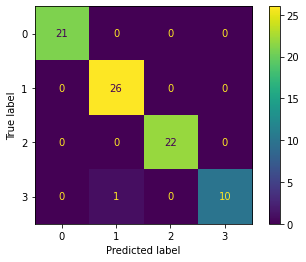

In [80]:
clf,predicted,predict_probability = SVM_model(x_train,y_train,x_test,y_test)
print(f'the accuracy is {metrics.accuracy_score(y_test,predicted)}')
#print(f'the predicted probability is {predict_probability}')
print(metrics.confusion_matrix(y_test,predicted))
print(metrics.classification_report(y_test,predicted))
print(metrics.plot_confusion_matrix(clf,x_test,y_test))

In [92]:
#------------>>>Perceptron classifiers<<<----------
from sklearn.linear_model import Perceptron
def Perceptron_model(x_train,y_train,x_test,y_test):
  clf = Perceptron(random_state=0,n_iter_no_change=80)
  clf=clf.fit(x_train,y_train)
  predicted = clf.predict(x_test)
  return clf ,predicted

the accuracy is 0.7625
[[21  0  0  0]
 [ 0  8 18  0]
 [ 1  0 21  0]
 [ 0  0  0 11]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.31      0.47        26
           2       0.54      0.95      0.69        22
           3       1.00      1.00      1.00        11

    accuracy                           0.76        80
   macro avg       0.87      0.82      0.78        80
weighted avg       0.86      0.76      0.74        80



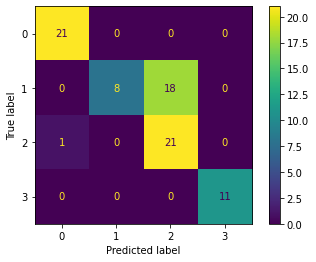

In [93]:
clf,predicted = Perceptron_model(x_train,y_train,x_test,y_test)
print(f'the accuracy is {metrics.accuracy_score(y_test,predicted)}')
print(metrics.confusion_matrix(y_test,predicted))
print(metrics.classification_report(y_test,predicted))
print(metrics.plot_confusion_matrix(clf,x_test,y_test))

#plot data

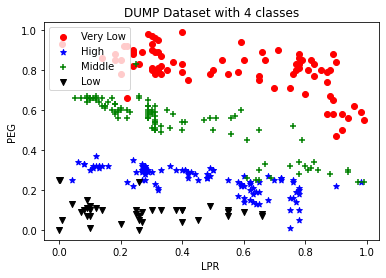

In [17]:
colors = ['r', 'b', 'g','black']
markers = ['o', '*', '+','v']
class_names=['Very Low', 'High', 'Middle', 'Low']
labels=y_train
cls = [0, 1, 2,3]
x_train=np.array(x_train)

for class_index in range(len(cls)):
    plt.scatter(x_train[labels == cls[class_index],0], x_train[labels == cls[class_index],1], c=colors[class_index], marker=markers[class_index], label=class_names[class_index])
# 0,1 -----> the first and second column ( الداتا بتاعتى )
# label---->  to write name classes as key map with the help of legend()
Title = "DUMP Dataset with {n} classes".format(n=int(len(cls)))
plt.title(Title)
plt.xlabel("LPR ")
plt.ylabel('PEG')
plt.legend()

#build_regions

In [18]:
def plot_decesion(model,x_train):
  cm = plt.cm.Set1 
  #lists of colors
  x_min, x_max =  x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
  y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
  XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
  #meshgrid--->>>> plot the values on x_axiz and on y_axiz and control all step 

  z = model.predict(np.c_[XX.ravel(), YY.ravel()])
  ZZ = z.reshape(XX.shape)
  plt.contourf(XX, YY, ZZ, alpha=0.2)
  plt.scatter(
          x_train[:, 0],
          x_train[:, 1],
          c=y_train,#make each label with different color
          cmap=cm,
          edgecolors='k',
          alpha=1,
      )
  plt.title('decesion_boundry')

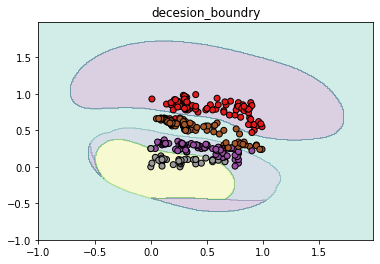

In [61]:
clf,predicted,predict_probability = SVM_model(x_train,y_train,x_test,y_test)
plot_decesion(clf,x_train)

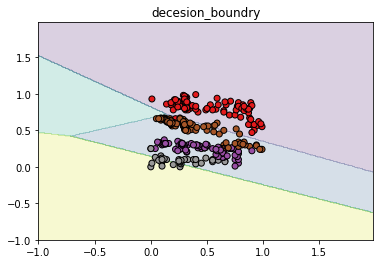

In [63]:
clf2,predicted2, = Perceptron_model(x_train,y_train,x_test,y_test)
plot_decesion(clf2,x_train)

#second_problem 

#binarized labels

In [21]:
train_data['UNS'].unique()

array([3, 0, 2, 1])

In [22]:
def LabelBinarizer(df,class_label,new_feature):
   l = []
   for i,j in zip(df['UNS'],range(len(df['UNS']))):
      if i == class_label:
        l.append(1)
      else:
        l.append(0)
   df[new_feature] = l
   return  df

In [23]:
LabelBinarizer(train_data,0,'zero')
LabelBinarizer(train_data,1,'one')
LabelBinarizer(train_data,2,'two')
LabelBinarizer(train_data,3,'three')
LabelBinarizer(test_data,0,'zero')
LabelBinarizer(test_data,1,'one')
LabelBinarizer(test_data,2,'two')
LabelBinarizer(test_data,3,'three')
print(train_data.head())
print(test_data.head())

    STG   SCG   STR   LPR   PEG  UNS  zero  one  two  three
0  0.00  0.00  0.00  0.00  0.00    3     0    0    0      1
1  0.08  0.08  0.10  0.24  0.90    0     1    0    0      0
2  0.10  0.10  0.15  0.65  0.30    2     0    0    1      0
3  0.08  0.08  0.08  0.98  0.24    1     0    1    0      0
4  0.09  0.15  0.40  0.10  0.66    2     0    0    1      0
     STG    SCG    STR   LPR   PEG  UNS  zero  one  two  three
0  0.420  0.290  0.140  0.03  0.68    2     0    0    1      0
1  0.100  0.100  0.520  0.78  0.34    2     0    0    1      0
2  0.510  0.255  0.550  0.17  0.64    2     0    0    1      0
3  0.250  0.540  0.310  0.25  0.08    3     0    0    0      1
4  0.258  0.250  0.295  0.33  0.77    0     1    0    0      0


#one-versus-all

In [65]:
#--------------------svm  ---------------------
from sklearn.svm import SVC
def SVM_model_versus_all(x_train,y_train,x_test,y_test):
  clf=OneVsRestClassifier(SVC(random_state=42,probability=True))
  clf = clf.fit(x_train,y_train)
  predicted=clf.predict(x_test)
  predicted_probability=clf.predict_proba(x_test)
  print(f'the accuracy is {metrics.accuracy_score(y_test,predicted)}')
  accuracy=metrics.accuracy_score(y_test,predicted)
  return clf,predicted,predicted_probability,accuracy

In [25]:
def plot_decesion_ovr(model, x_train,y_t):
  cm = plt.cm.Set1
  x_min, x_max =  x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
  y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
  XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  z = model.predict(np.c_[XX.ravel(), YY.ravel()])
  ZZ = z.reshape(XX.shape)
  plt.contourf(XX, YY, ZZ, alpha=0.2)
  plt.scatter(
          x_train[:, 0],
          x_train[:, 1],
          c=y_t,
          cmap=cm,
          edgecolors='k',
          alpha=1,
      )
  plt.title('decesion_boundry')

the accuracy is 1.0


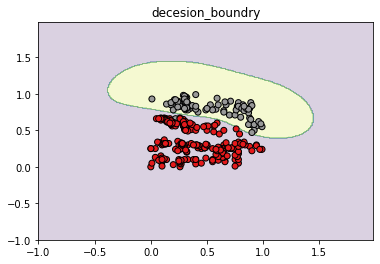

In [66]:
model_zero,predicted0,predicted_probability0,accuracy0=SVM_model_versus_all(x_train,train_data['zero'],x_test,test_data['zero'])
plot_decesion_ovr(model_zero,x_train,train_data['zero'])


the accuracy is 0.975


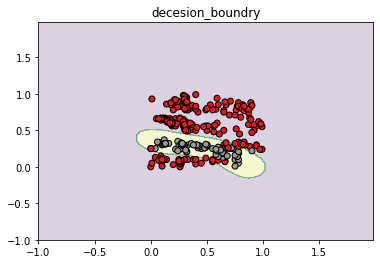

In [68]:
model_one,predicted_one,predicted_probability_one,accuracy_one=SVM_model_versus_all(x_train,train_data['one'],x_test,test_data['one'])
plot_decesion_ovr(model_one,x_train,train_data['one'])

the accuracy is 1.0


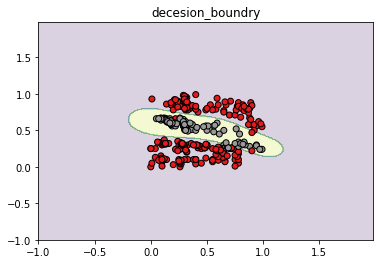

In [69]:
model_two,predicted_two,predicted_probability_two,accuracy_two=SVM_model_versus_all(x_train,train_data['two'],x_test,test_data['two'])
plot_decesion_ovr(model_two,x_train,train_data['two'])

the accuracy is 0.9875


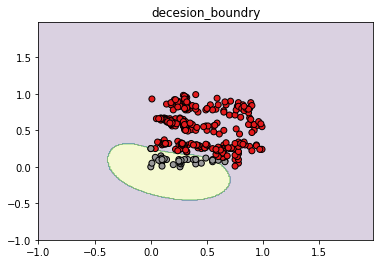

In [70]:
model_three,predicted_three,predicted_probability_three,accuracy_three=SVM_model_versus_all(x_train,train_data['three'],x_test,test_data['three'])
plot_decesion_ovr(model_three,x_train,train_data['three'])

#Arg_max

In [78]:
import numpy as np
pre=np.argmax([predicted_probability0,predicted_probability_one,predicted_probability_two,predicted_probability_three],axis=0)
# print(predicted_probability0)
# print(predicted_probability_one)
# print(predicted_probability_two)
# print(predicted_probability_three)
print(f'the final predicted is\n: {pre.shape}')
print(f'the final predicted is\n: {pre}')
# print(accuracy0)
# print(accuracy_one)
# print(accuracy_two)
# print(accuracy_three)
# accur=np.argmax([accuracy0,accuracy_one,accuracy_two,accuracy_three],axis=0)
# print(f"the index of final accuracy is : \n{accur}")

the final predicted is
: (80, 2)
the final predicted is
: [[1 2]
 [3 2]
 [3 2]
 [2 3]
 [1 0]
 [1 0]
 [3 2]
 [1 0]
 [0 1]
 [3 2]
 [3 2]
 [3 1]
 [1 0]
 [2 3]
 [1 0]
 [3 1]
 [3 2]
 [1 0]
 [0 1]
 [3 2]
 [0 1]
 [0 1]
 [1 2]
 [3 2]
 [3 2]
 [3 1]
 [3 2]
 [1 0]
 [3 2]
 [1 0]
 [1 0]
 [1 0]
 [1 2]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [2 3]
 [3 1]
 [0 1]
 [3 2]
 [1 0]
 [0 1]
 [3 2]
 [3 1]
 [1 0]
 [0 1]
 [1 0]
 [2 3]
 [0 1]
 [1 2]
 [1 0]
 [0 1]
 [1 0]
 [3 1]
 [2 3]
 [0 1]
 [0 1]
 [3 2]
 [1 0]
 [1 0]
 [0 1]
 [2 3]
 [3 2]
 [2 1]
 [2 3]
 [2 3]
 [2 3]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 2]
 [1 2]
 [3 2]
 [0 1]
 [2 3]
 [1 0]
 [2 1]]


#third_problem

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
def get_data():
  import pandas as pd

  train = pd.read_csv('DUMD_train.csv')
  test = pd.read_csv('DUMD_test.csv')
  
  x_train = train.iloc[:,:-1]
  y_train = train.iloc[:,-1:]
  x_test = test.iloc[:,:-1]
  y_test = test.iloc[:,-1:]
  return x_train, y_train, x_test, y_test

In [33]:
def encode_labels(y_train, y_test):
  from sklearn.preprocessing import LabelEncoder

  encoder = LabelEncoder()
  y_train.iloc[:,-1] = encoder.fit_transform(y_train.iloc[:,-1])
  y_test.iloc[:,-1] = encoder.transform(y_test.iloc[:,-1])

In [34]:
def select_features(x_train, x_test, y_train):
  from sklearn.feature_selection import GenericUnivariateSelect
  from sklearn.feature_selection import chi2 , f_classif 

  FeatureSelection = GenericUnivariateSelect(score_func=chi2, mode= 'k_best', param=2)
  # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe

  selected_feature= FeatureSelection.fit_transform(x_train, y_train)

  f = list(FeatureSelection.get_support())
  col = list(x_train.columns)
  col = [col[i] for i, v in enumerate(f) if v]
  x_train = x_train[col]
  x_test = x_test[col]
  return x_train, x_test

In [35]:
def df2np(x_train, x_test, y_train, y_test):
  return x_train.values, x_test.values, y_train.values.flatten(), y_test.values.flatten()

In [36]:
def ovo_data(x_train, y_train, ovo_cls):
  import numpy as np
  x = []
  y = []
  for i, v in enumerate(y_train):
    if v in ovo_cls:
      x.append(x_train[i])
      y.append((v==ovo_cls[0])*1)
  return np.array(x), np.array(y)

In [37]:
def modify_data_and_train_models(x_train, y_train,x_test, y_test, classes):
  from sklearn import svm
  models = []
  x_train_sub_sets = []
  y_train_sub_sets = []
  x_test_sub_sets = []
  y_test_sub_sets = []
  for i in classes:
    j = i + 1
    while j in classes:
      x, y = ovo_data(x_train, y_train, [i, j])
      x_ts, y_ts = ovo_data(x_test, y_test, [i, j])
      
      model = svm.SVC(kernel='rbf', decision_function_shape='ovo', C=1, probability=True)
      model.fit(x, y)
      models.append(model)
      
      x_train_sub_sets.append(x)
      y_train_sub_sets.append(y)
      x_test_sub_sets.append(x_ts)
      y_test_sub_sets.append(y_ts)
      j += 1
  return models, x_train_sub_sets, y_train_sub_sets, x_test_sub_sets, y_test_sub_sets

In [38]:
def predict(models, x_test, classes):
  import numpy as np
  predictions = []
  prob_preds = []
  for model in models:
    predictions.append(model.predict(x_test))
    prob_preds.append(model.predict_proba(x_test))
    # print(list(model.predict(x_test)))
  predictions = np.array(predictions)

  final_predictions = []
  for i in range(predictions.shape[1]):
    m_preds = predictions[:,[i]].flatten()

    p_ind = 0
    pred = []
    for i in classes:
      j = i + 1
      while j in classes:
        p = m_preds[p_ind] * i + (1 - m_preds[p_ind]) * j
        pred.append(p)
        j += 1
        p_ind += 1

    scores = [pred.count(i) for i in classes]
    res = np.argmax(scores)
    final_predictions.append(res)
    # print(list(encoder.inverse_transform([res]))[0])
  final_predictions = np.array(final_predictions)
  return final_predictions

In [39]:
def sub_pred(model, x_test):
  return model.predict(x_test).flatten()

In [40]:
def ovo_svm():
  x_train, y_train, x_test, y_test = get_data()
  labels = list(set(y_train.values.flatten()))
  encode_labels(y_train, y_test)
  x_train, x_test = select_features(x_train, x_test, y_train)
  x_train, x_test, y_train, y_test = df2np(x_train, x_test, y_train, y_test)
  classes = list(set(y_train))
  models, x_train_sub_sets, y_train_sub_sets, x_test_sub_sets, y_test_sub_sets = modify_data_and_train_models(x_train, y_train, x_test, y_test, classes)
  y_pred = predict(models, x_test, classes)
  return models, x_train, y_train, x_test, y_test, y_pred, x_train_sub_sets, y_train_sub_sets, x_test_sub_sets, y_test_sub_sets, labels

In [41]:
def plot_model(models, x, y, labels):
  from mlxtend.plotting import plot_decision_regions
  import matplotlib.pyplot as plt
  for model in models:  
    y = y.reshape((-1,))
    ax = plot_decision_regions(x, y, clf=model, legend=2)
    handles, labeles = ax.get_legend_handles_labels()
    ax.legend(handles, labels, 
           framealpha=0.3, scatterpoints=1)
    plt.title('SVM Decision Boundaries')
    plt.xlabel('x1')
    plt.ylabel('x2')
  plt.show()

In [42]:
def report(y_test, y_pred):
  from sklearn.metrics import accuracy_score
  import matplotlib.pyplot as plt
  from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print("\n\nAccuracy = ", accuracy, "\n\n")
  print("Confusion Matrix:")
  ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
  plt.show()
  print("\n\nClassification Report:\n", classification_report(y_test, y_pred))

In [43]:

models, x_train, y_train, x_test, y_test, y_pred, x_train_sub_sets, y_train_sub_sets, x_test_sub_sets, y_test_sub_sets, labels = ovo_svm()

**Model_1**

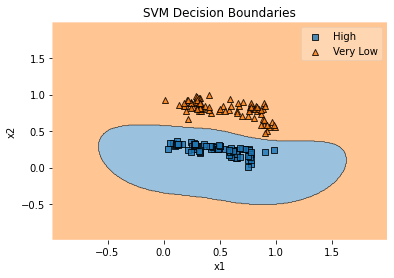



Accuracy =  1.0 


Confusion Matrix:


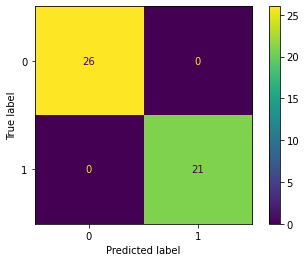



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        21

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



In [44]:
model1 = models[0]
plot_model([model1], x_train_sub_sets[0], y_train_sub_sets[0], [labels[0], labels[1]])
report(y_test_sub_sets[0], sub_pred(model1, x_test_sub_sets[0]))

**Model_2**

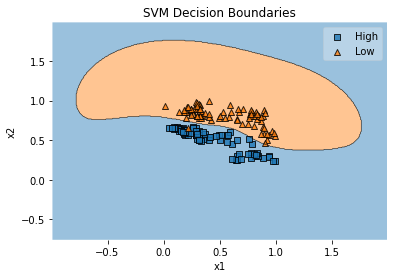



Accuracy =  0.6976744186046512 


Confusion Matrix:


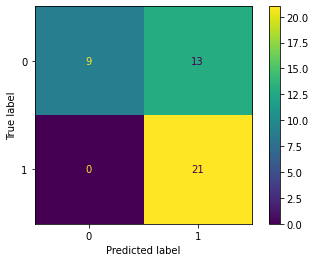



Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.41      0.58        22
           1       0.62      1.00      0.76        21

    accuracy                           0.70        43
   macro avg       0.81      0.70      0.67        43
weighted avg       0.81      0.70      0.67        43



In [45]:
model2 = models[1]
plot_model([model2], x_train_sub_sets[1], y_train_sub_sets[1], [labels[0], labels[2]])
report(y_test_sub_sets[1], sub_pred(model1, x_test_sub_sets[1]))

**Model_3**

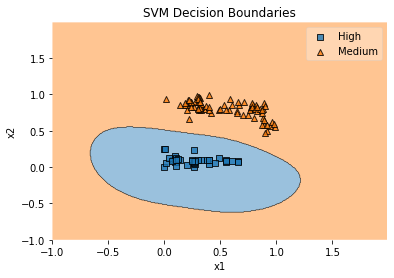



Accuracy =  1.0 


Confusion Matrix:


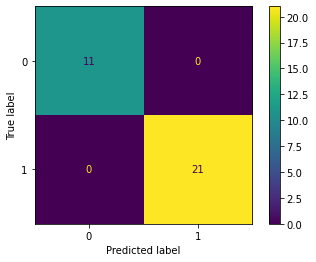



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        21

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [46]:
model3 = models[2]
plot_model([model3], x_train_sub_sets[2], y_train_sub_sets[2], [labels[0], labels[3]])
report(y_test_sub_sets[2], sub_pred(model1, x_test_sub_sets[2]))

**Model_4**

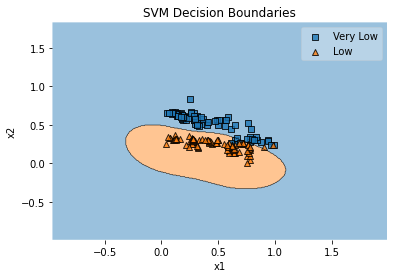



Accuracy =  0.1875 


Confusion Matrix:


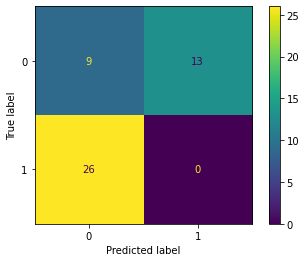



Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.41      0.32        22
           1       0.00      0.00      0.00        26

    accuracy                           0.19        48
   macro avg       0.13      0.20      0.16        48
weighted avg       0.12      0.19      0.14        48



In [47]:
model4 = models[3]
plot_model([model4], x_train_sub_sets[3], y_train_sub_sets[3], [labels[1], labels[2]])
report(y_test_sub_sets[3], sub_pred(model1, x_test_sub_sets[3]))

**Model_5**

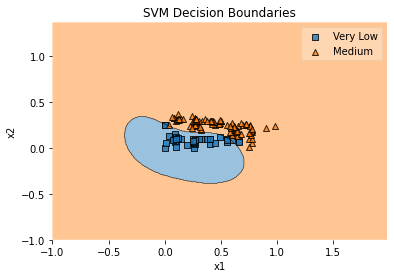



Accuracy =  0.2972972972972973 


Confusion Matrix:


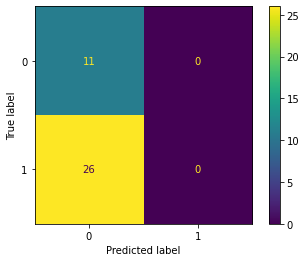



Classification Report:
               precision    recall  f1-score   support

           0       0.30      1.00      0.46        11
           1       0.00      0.00      0.00        26

    accuracy                           0.30        37
   macro avg       0.15      0.50      0.23        37
weighted avg       0.09      0.30      0.14        37



In [48]:
model5 = models[4]
plot_model([model5], x_train_sub_sets[4], y_train_sub_sets[4], [labels[1], labels[3]])
report(y_test_sub_sets[4], sub_pred(model1, x_test_sub_sets[4]))

**Model_6**

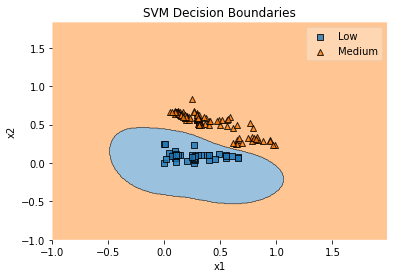



Accuracy =  0.7272727272727273 


Confusion Matrix:


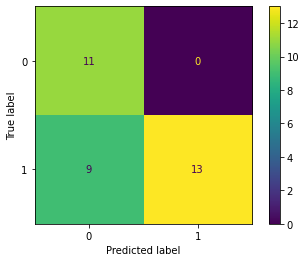



Classification Report:
               precision    recall  f1-score   support

           0       0.55      1.00      0.71        11
           1       1.00      0.59      0.74        22

    accuracy                           0.73        33
   macro avg       0.78      0.80      0.73        33
weighted avg       0.85      0.73      0.73        33



In [49]:
model6 = models[5]
plot_model([model6], x_train_sub_sets[5], y_train_sub_sets[5], [labels[2], labels[3]])
report(y_test_sub_sets[5], sub_pred(model1, x_test_sub_sets[5]))

**The final model**

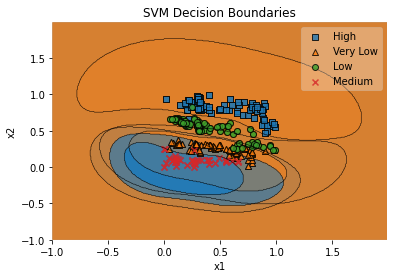



Accuracy =  0.9875 


Confusion Matrix:


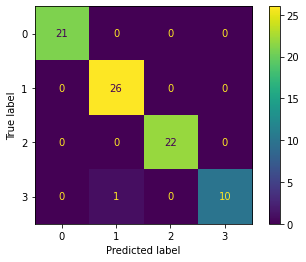



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        22
           3       1.00      0.91      0.95        11

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.98        80
weighted avg       0.99      0.99      0.99        80



In [50]:
plot_model(models, x_train, y_train, labels)
report(y_test, y_pred)